<a href="https://colab.research.google.com/github/ErnestoFCh/Simulacion-II/blob/main/Algoritmo_Metropolis_Hastings_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Algoritmo Metropolis-Hastings
El algoritmo Metropolis-Hastings es un método de Monte Carlo en cadena de Markov (MCMC) utilizado para obtener una secuencia de muestras aleatorias de una distribución de probabilidad, especialmente cuando el muestreo directo es difícil.

###¿Cómo funciona?
El algoritmo genera nuevas muestras en dos pasos principales:

- Propuesta de una nueva muestra: Se genera una nueva muestra basada en la muestra actual.
- Aceptación o rechazo: La nueva muestra se acepta o se rechaza según una probabilidad que depende de la distribución objetivo.

###Vamos a simular por algoritmo de Metropoli-Hasting la distribución de poisson

$$f(k;λ) =  \frac{e^{-λ}-λ^{k}}{k!} $$

In [148]:
%matplotlib inline

In [149]:
def poisson_prob(lam,k):
 return poisson.pmf(k, lam)

In [150]:
lam = 5   #valor lambda de la distribución
delta = 1 #tamaño de la propuesta (controla la magnitud del cambio)
n = 50000
x = np.zeros(n, dtype=int) #las muestras deben ser enteras
x[0] = 0
acept = 0

In [137]:
#Algoritmo M-H

for i in range(0,n-1):
  y = x[i] + np.random.randint(-delta,delta+1) #Propuesta discreta entre -1, 0, 1
  if y < 0:
    y = 0
  if np.random.rand() < min(1, poisson_prob(y, lam) / poisson_prob(x[i], lam)): #calcular la probabilidad de aceptar la propuesta
    x[i+1] = y
    acept += 1
  else:
    x[i+1] = x[i]

<ipython-input-137-4abc799cef2d>:7: RuntimeWarning: divide by zero encountered in scalar divide
  if np.random.rand() < min(1, poisson_prob(y, lam) / poisson_prob(x[i], lam)): #calcular la probabilidad de aceptar la propuesta


In [138]:
print("La aceptacion fue del ",acept/n*100,"%")

La aceptacion fue del  88.146 %


In [139]:
print("Media de las muestras: ",np.mean(x))
print("desviacion estandar de las muestras: ",np.std(x))

Media de las muestras:  5.95606
desviacion estandar de las muestras:  2.4026671172678085


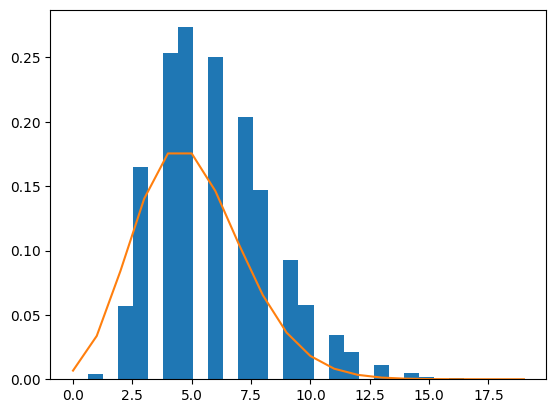

In [140]:
plt.hist(x,density=True,bins=30) #Histograma de las muestras
k_values = np.arange(0, np.max(x)+1)
plt.plot(k_values,poisson.pmf(k_values, lam)) #grafica analitica

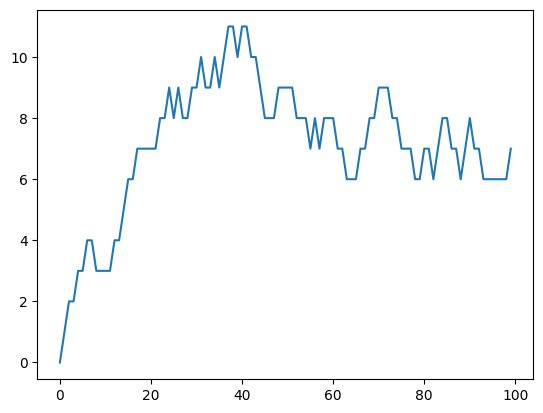

In [141]:
plt.plot(x[:100])

###Vamos a simular por algoritmo de Metropoli-Hasting la distribución de Gamma:

$$f(x;α,β) =  \frac{λ(λx)^{α-1} e^{-λx}}{Γ(α)} $$
con: $$ α=k$$ y $$ λ=\frac{1}{β} $$

In [142]:
from scipy.stats import gamma

In [143]:
def gamma_prob(x, alpha, beta):
    return gamma.pdf(x, alpha, scale=1/beta)

In [144]:
alpha = 2.0  # forma (shape)
beta = 1.0   # tasa (rate)
n = 50000
x1 = np.zeros(n)
x1[0] = 1  #valor inicial mayor que 0, ya que gamma es para valores positivos
acept = 0
delta = 1

In [145]:
#Algoritmo M-H

for i in range(0,n-1):
  y = x1[i] + np.random.uniform(-delta,delta)
  if y < 0:
    y = y = 0.001 #valor mayor que 0 ya que gamma es para valores positivos
  if np.random.rand() < min(1, gamma_prob(y, alpha, beta) / gamma_prob(x1[i], alpha, beta)): #calcular la probabilidad de aceptar la propuesta
    x1[i+1] = y
    acept += 1
  else:
    x1[i+1] = x1[i]

In [146]:
print("La aceptacion fue del ",acept/n*100,"%")

La aceptacion fue del  81.63 %


In [151]:
print("Media de las muestras: ",np.mean(x1))
print("desviacion estandar de las muestras: ",np.std(x1))

Media de las muestras:  1.9572705411518756
desviacion estandar de las muestras:  1.3872599069426854


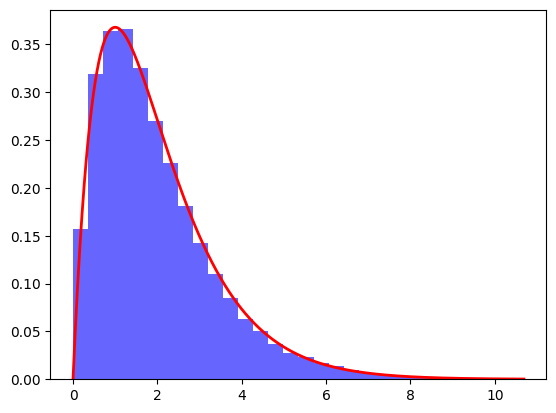

In [152]:
plt.hist(x1, density=True, bins=30, alpha=0.6, color='b') #Histograma de las muestras
xs = np.linspace(0, np.max(x1), 1000)
gamma_pdf = gamma.pdf(xs, alpha, scale=1/beta)
plt.plot(xs, gamma_pdf, 'r-', lw=2) #Grafica analitica

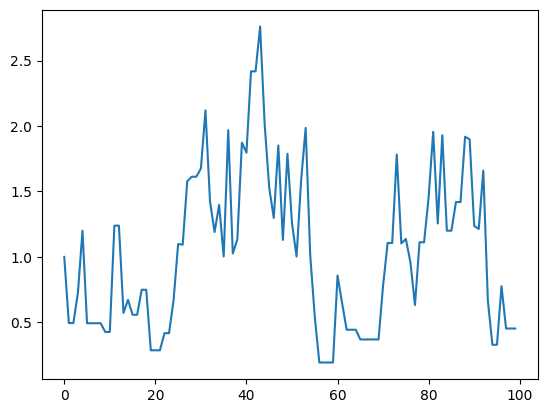

In [153]:
plt.plot(x1[:100])

###Vamos a simular por algoritmo de Metropoli-Hasting la distribución T:

$$f(t; \nu) = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\sqrt{\nu \pi} \Gamma\left(\frac{\nu}{2}\right)} \left(1 + \frac{x^2}{\nu}\right)^{-\frac{\nu + 1}{2}} $$

In [154]:
from scipy.stats import t

In [155]:
nu = 5  #grados de libertad
n = 50000
x2 = np.zeros(n)
x2[0] = 0
acept = 0
delta = 1.0

In [156]:
def t_student_prob(x, nu):
    return t.pdf(x, df=nu)

In [157]:
#Algoritmo M-H

for i in range(0,n-1):
  y = x2[i] + np.random.uniform(-delta,delta)
  if np.random.rand() < min(1, min(1, t_student_prob(y, nu) / t_student_prob(x2[i], nu))): #calcular la probabilidad de aceptar la propuesta
    x2[i+1] = y
    acept += 1
  else:
    x2[i+1] = x2[i]

In [158]:
print("La aceptacion fue del ",acept/n*100,"%")

La aceptacion fue del  81.638 %


In [159]:
print("Media de las muestras: ",np.mean(x2))
print("desviacion estandar de las muestras: ",np.std(x2))

Media de las muestras:  0.021741351195988603
desviacion estandar de las muestras:  1.3157817399856633


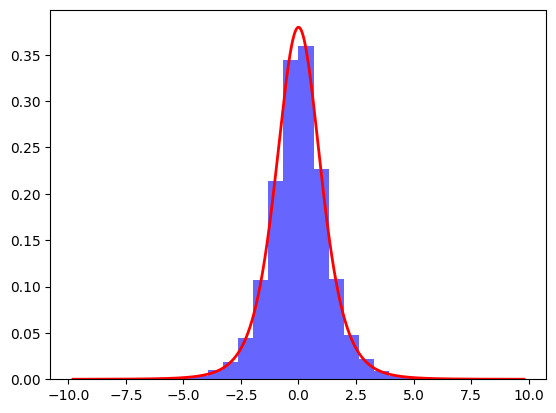

In [160]:
plt.hist(x2, density=True, bins=30, alpha=0.6, color='b') #Histograma de las muestras
xs = np.linspace(np.min(x2), np.max(x2), 1000)
t_pdf = t.pdf(xs, df=nu)
plt.plot(xs, t_pdf, 'r-', lw=2) #Grafica Analitica

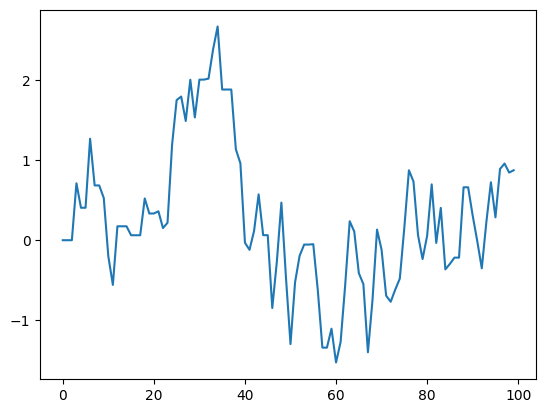

In [161]:
plt.plot(x2[:100])